## Project notebook

Using tensorflow and keras wrapper

In [3]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import utils
import models
from PIL import Image

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


## Load training data

In [9]:
X_train, y_train, meanImage, ids = utils.load_training_data();

num_classes = len(ids);
crop = 0; 
X_train = utils.crop_image(X_train, crop, crop);
print("cropped X_train shape:", X_train.shape)
print("number of classes = ", num_classes)

X_train shape: (100000, 64, 64, 3)
y_train shape: (100000,)
cropped X_train shape: (100000, 64, 64, 3)
number of classes =  200


(-0.5, 63.5, 63.5, -0.5)

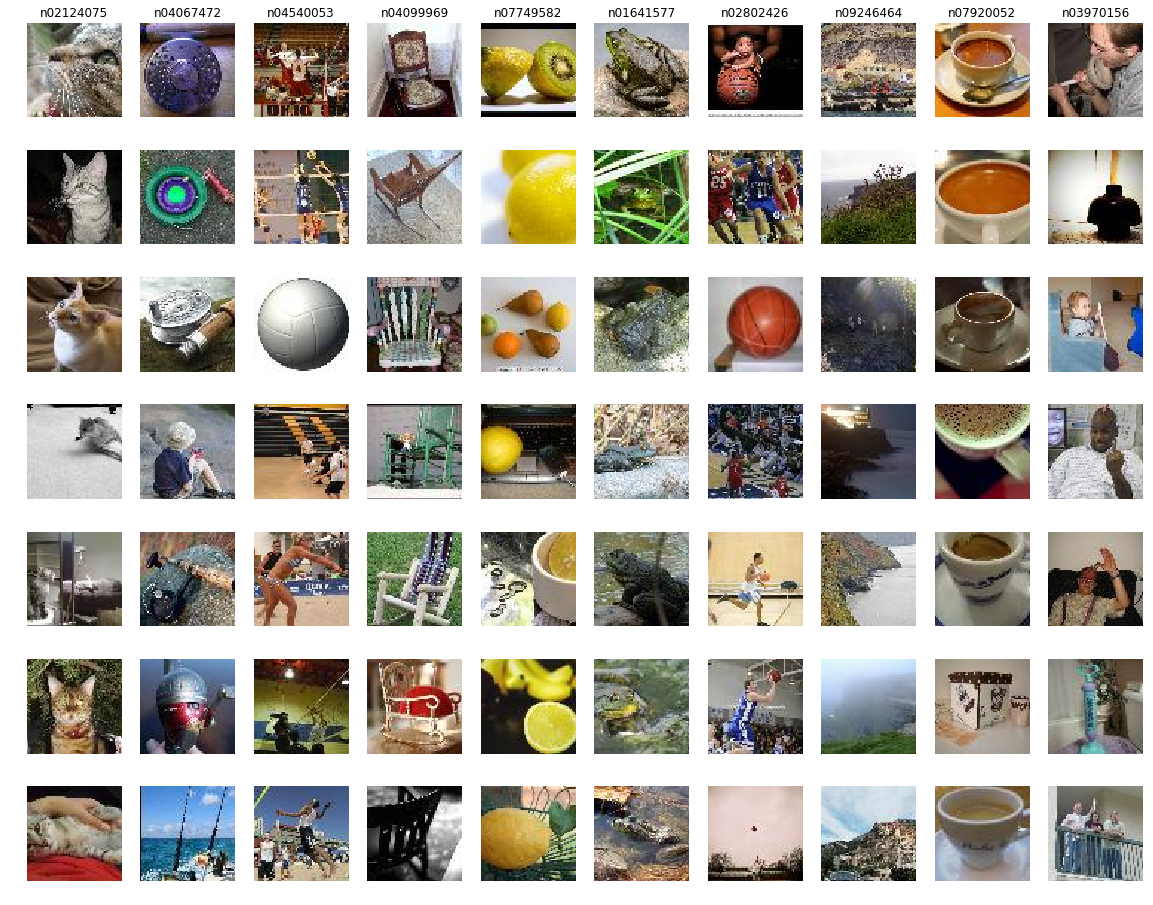

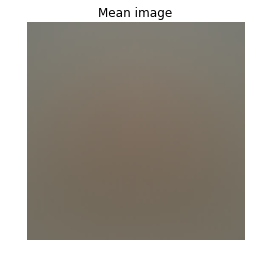

In [10]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
if crop != 0:
    meanImage = meanImage[crop:-crop, crop:-crop, :];
    
classes = ids[0:10];
num_classes = len(classes);
samples_per_class = 7;
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((128*X_train[idx] + meanImage).astype('uint8'), interpolation="nearest")
        plt.axis('off')
        if i == 0:
            plt.title(cls)

# mean image
plt.figure(figsize = (5,4));
plt.imshow(meanImage.astype('uint8'), interpolation="nearest")
plt.title('Mean image')
plt.axis('off')

## Load validation data

In [11]:
X_val, y_val = utils.load_validation_data(ids, meanImage);
X_val = utils.crop_image(X_val, crop, crop);
print("cropped X_val shape:", X_val.shape)

X_val shape: (10000, 64, 64, 3)
y_val shape: (10000,)
cropped X_val shape: (10000, 64, 64, 3)


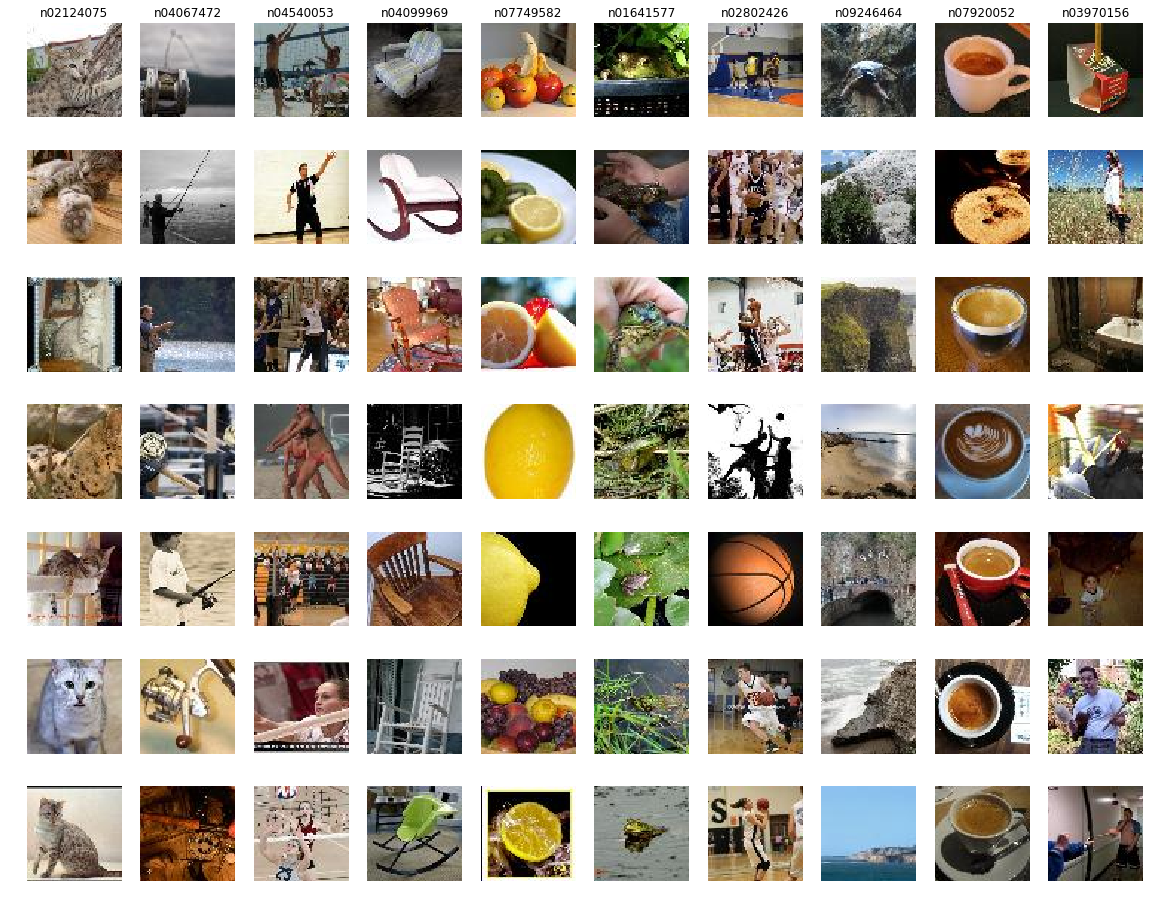

In [12]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
plt.figure();
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_val == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((128*X_val[idx] + meanImage).astype('uint8'), interpolation="nearest")
        plt.axis('off')
        if i == 0:
            plt.title(cls)


## Load test data

In [13]:
X_test, test_files = utils.load_test_data(meanImage);
X_test = utils.crop_image(X_test, crop, crop);
print("cropped X_test shape:", X_test.shape)

X_test shape: (10000, 64, 64, 3)
cropped X_test shape: (10000, 64, 64, 3)


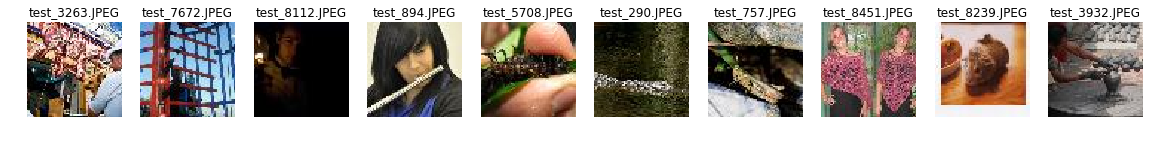

In [14]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
plt.figure();
num_samples = 10;
idxs = np.random.choice(range(len(test_files)), num_samples, replace=False)
for i, idx in enumerate(idxs):
    plt.subplot(1, num_samples, i+1)
    plt.imshow((128*X_test[idx] + meanImage).astype('uint8'), interpolation="nearest")
    plt.axis('off')
    plt.title(test_files[idx])


## Train and evaluate model

In [15]:
# From https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
model = models.VGG_16((64, 64, 3));

sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

y_train_categorical = np_utils.to_categorical(y_train, num_classes=200);
y_val_categorical = np_utils.to_categorical(y_val, num_classes=200);

history = model.fit(X_train, y_train_categorical, batch_size=200, epochs=20, validation_data=(X_val, y_val_categorical), verbose=True)
metrics = model.evaluate(X_val, y_val_categorical, verbose=True)


Train on 100000 samples, validate on 10000 samples
Epoch 1/20
100000/100000 [==============================] - 483s - loss: 5.1398 - acc: 0.0136 - val_loss: 5.1214 - val_acc: 0.0224
Epoch 2/20
100000/100000 [==============================] - 474s - loss: 4.7179 - acc: 0.0502 - val_loss: 4.7495 - val_acc: 0.0647
Epoch 3/20
100000/100000 [==============================] - 475s - loss: 4.2375 - acc: 0.1021 - val_loss: 4.3238 - val_acc: 0.1345
Epoch 4/20
100000/100000 [==============================] - 474s - loss: 3.8857 - acc: 0.1507 - val_loss: 4.0483 - val_acc: 0.1758
Epoch 5/20
100000/100000 [==============================] - 475s - loss: 3.6222 - acc: 0.1916 - val_loss: 3.8491 - val_acc: 0.2021
Epoch 6/20
100000/100000 [==============================] - 474s - loss: 3.4106 - acc: 0.2269 - val_loss: 3.6704 - val_acc: 0.2444
Epoch 7/20
100000/100000 [==============================] - 474s - loss: 3.2297 - acc: 0.2589 - val_loss: 3.6010 - val_acc: 0.2386
Epoch 8/20
100000/100000 [======

In [ ]:
from pylab import savefig

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
savefig('accuracy.png', bbox_inches='tight')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
savefig('loss.png', bbox_inches='tight')

model.save('milestone_model.h5')

utils.save_historty(history.historty, 'milestone_results.txt')


# Loading model
# from keras.models import load_model

# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')